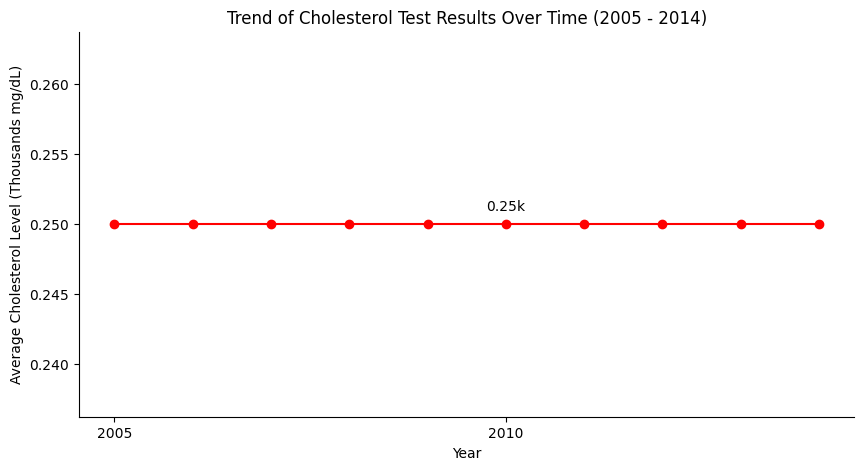

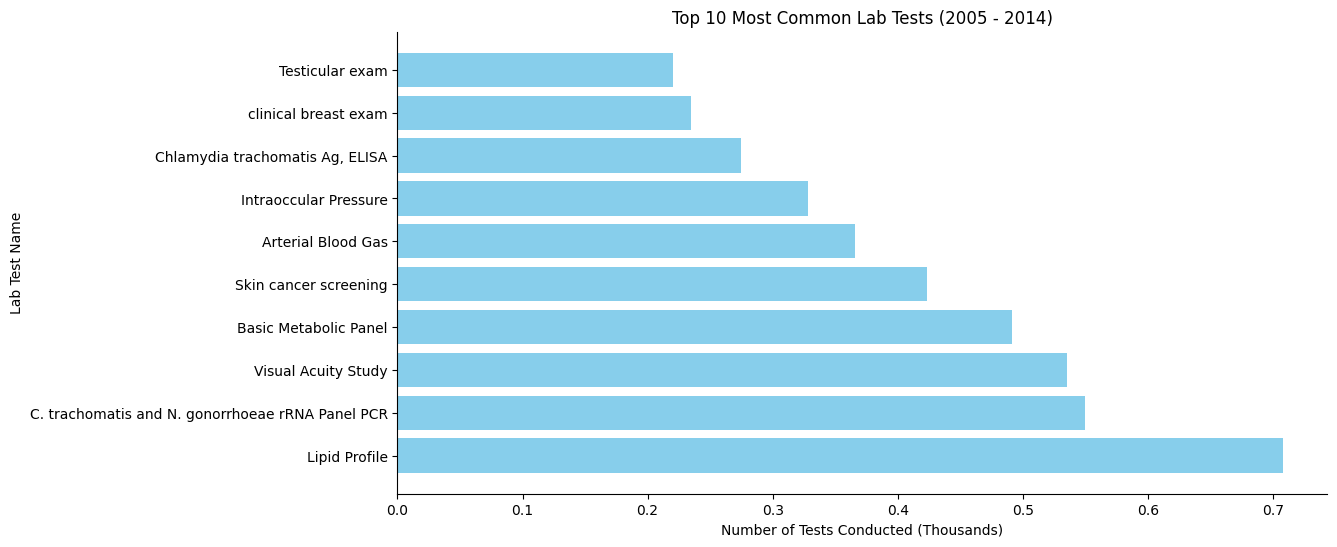

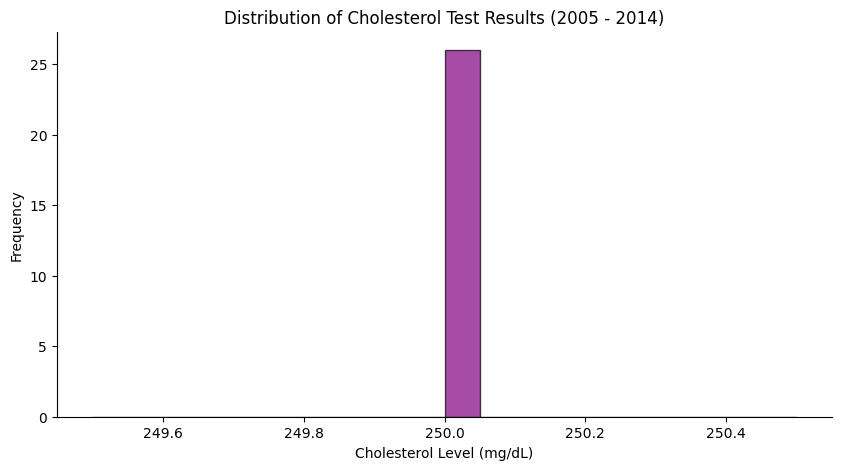

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = "Lab Results.csv"
df_lab = pd.read_csv(file_path, encoding="latin1", low_memory=False)
df_lab["Date_Collected"] = pd.to_datetime(df_lab["Date_Collected"], errors="coerce")
df_lab["Numeric_Result"] = pd.to_numeric(df_lab["Numeric_Result"], errors="coerce")
time_period = f"({df_lab['Date_Collected'].min().year} - {df_lab['Date_Collected'].max().year})"

# Visualization 1: Trend of Cholesterol Test Results Over Time
def plot_cholesterol_trend():
    cholesterol_df = df_lab[df_lab["Test_Name"].str.contains("Cholesterol", case=False, na=False)].dropna(subset=["Numeric_Result"])
    cholesterol_df["Year"] = cholesterol_df["Date_Collected"].dt.year
    cholesterol_trend = cholesterol_df.groupby("Year")["Numeric_Result"].mean() / 1000  # Convert to thousands
    
    plt.figure(figsize=(10, 5))
    plt.plot(cholesterol_trend.index, cholesterol_trend.values, marker="o", linestyle="-", color="red")
    plt.xlabel("Year")
    plt.ylabel("Average Cholesterol Level (Thousands mg/dL)")
    plt.title(f"Trend of Cholesterol Test Results Over Time {time_period}")
    plt.xticks(np.arange(min(cholesterol_trend.index), max(cholesterol_trend.index) + 1, 5))  # Ticks every 5 years
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    for year in [2010, 2015]:
        if year in cholesterol_trend.index:
            plt.annotate(f"{cholesterol_trend[year]:.2f}k", 
                         (year, cholesterol_trend[year]),
                         textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='black')
    
    plt.show()

# Visualization 2: Distribution of Different Lab Tests
def plot_test_distribution():
    test_counts = df_lab["Test_Name"].value_counts().head(10) / 1000  # Convert to thousands
    
    plt.figure(figsize=(12, 6))
    plt.barh(test_counts.index, test_counts.values, color="skyblue")
    plt.xlabel("Number of Tests Conducted (Thousands)")
    plt.ylabel("Lab Test Name")
    plt.title(f"Top 10 Most Common Lab Tests {time_period}")
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()

# Visualization 3: Histogram of Cholesterol Levels
def plot_cholesterol_histogram():
    cholesterol_df = df_lab[df_lab["Test_Name"].str.contains("Cholesterol", case=False, na=False)].dropna(subset=["Numeric_Result"])
    
    plt.figure(figsize=(10, 5))
    plt.hist(cholesterol_df["Numeric_Result"], bins=20, color="purple", alpha=0.7, edgecolor="black")
    plt.xlabel("Cholesterol Level (mg/dL)")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Cholesterol Test Results {time_period}")
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()

if __name__ == "__main__":
    plot_cholesterol_trend()
    plot_test_distribution()
    plot_cholesterol_histogram()
